In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from heapq import nsmallest
from scipy.signal import butter, lfilter, freqz
from scipy.fftpack import fft, ifft
from scipy import integrate
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.interpolate import CubicSpline , interp1d

In [13]:
#Lecture data: lines klaus, cromospheric spectrum, VALD
#c_lines_spectrum =  pd.read_csv("absortionlines.csv", delimiter = ',', header = 0)
clines = pd.read_csv("c_lines_spectrum.txt", delimiter = '\t', header = 0)
theoric_lines = pd.read_csv("c_lines_spectrum.txt", delimiter = '\t', header = 0)
#theoric_lines =  pd.read_excel("lines.xlsx",sheet_name="cromospheric_lines", columns = ['waveobs','wave_base', 'wave_top','element'] )
#theoric_lines['waveobs'] = theoric_lines['waveobs']/10
#theoric_lines['wave_base'] = theoric_lines['wave_base']/10
#theoric_lines['wave_top'] = theoric_lines['wave_top']/10
#c_s = pd.read_csv('Subtracted_spectrum_F1-9.txt', delimiter = '\t', header = 0)
#Atomic_lines = pd.read_csv('atomic_lines.tsv', delimiter = '\t', usecols = ['element', 'wave_A','loggf'], header = 0, low_memory=False, keep_default_na= False)

In [14]:
c_s

waveobs      flux       err
0       375.010  0.710204  0.043839
1       375.011  0.736027  0.044753
2       375.012  0.761851  0.045666
3       375.013  0.716938  0.044197
4       375.014  0.670040  0.042653
...         ...       ...       ...
194975  569.985  0.775035  0.018635
194976  569.986  0.764939  0.018558
194977  569.987  0.754843  0.018482
194978  569.988  1.699439  0.014429
194979  569.989  1.683852  0.014361

[194980 rows x 3 columns]

## Found absortion lines

In [17]:
top = []
for i in range(len(theoric_lines['wave_top'])):
    top.append(nsmallest(1,c_s['waveobs'], key = lambda x: abs(x-theoric_lines['wave_top'][i]))[0])

In [18]:
base = []
for i in range(len(theoric_lines['wave_base'])):
    base.append(nsmallest(1,c_s['waveobs'], key = lambda x: abs(x-theoric_lines['wave_base'][i]))[0])

In [20]:
len(base)

105

In [31]:
#Create new list with contain the absortion lines in cromospheric spectrum with its respective element
c_lines_spectrum = pd.DataFrame(columns = ['waveobs', 'wave_base', 'wave_top','element', 'flux', 'error_f'])
L = []
I = []
mins = []
       
for i in range(len(base)):
    b = c_s['waveobs']>base[i]
    a = c_s['waveobs']<top[i]
    c = a&b 
    min_ = min(c_s['flux'][c])
    L.append(c_s["waveobs"][c][c_s["flux"][c] == min_].tolist()[0])
    I.append(c_s['flux'][c][c_s["flux"][c] == min_].tolist()[0])
    mins.append(min_)
    
c_lines_spectrum['waveobs'] = L
c_lines_spectrum['wave_base'] = base
c_lines_spectrum['wave_top'] = top
c_lines_spectrum['element'] = theoric_lines['element']
c_lines_spectrum['flux'] = I
c_lines_spectrum['error_f'] = c_s['err']

In [32]:
c_lines_spectrum.to_csv("c_lines_spectrum.txt", sep='\t', index = False, header=True)

In [33]:
c_lines_spectrum

waveobs  wave_base  wave_top element      flux   error_f
0    376.141    376.075   376.210    Ti 2 -0.031778  0.043839
1    376.385    376.340   376.434    Fe 1  0.111095  0.044753
2    376.726    376.670   376.755    Fe 1  0.178483  0.045666
3    376.942    376.941   376.951     Ni2  0.414191  0.044197
4    377.067    377.058   377.068       H -0.018008  0.042653
..       ...        ...       ...     ...       ...       ...
100  456.378    456.348   456.432    Ti 2  0.189061  0.047022
101  457.202    457.147   457.248    Ti 2  0.161474  0.048734
102  458.351    458.303   458.352    Ti 2  0.621728  0.050448
103  458.996    458.962   459.028    Fe 1  0.521219  0.052161
104  462.937    462.910   462.969    Ti 2  0.408333  0.053875

[105 rows x 6 columns]

In [35]:
data_element = c_lines_spectrum[c_lines_spectrum['element'] == 'Ti 2']
data_element.index = list(range(len(data_element)))
data_element

waveobs  wave_base  wave_top element      flux   error_f
0   376.141    376.075   376.210    Ti 2 -0.031778  0.043839
1   378.801    378.758   378.821    Ti 2  0.487668  0.038036
2   382.041    381.998   382.102    Ti 2  0.062097  0.031372
3   382.455    382.405   382.491    Ti 2  0.325723  0.030359
4   391.357    391.302   391.398    Ti 2  0.088786  0.037501
5   393.370    393.361   393.371    Ti 2  0.023726  0.042899
6   394.525    394.516   394.526    Ti 2  1.241088  0.046374
7   399.902    399.893   399.903    Ti 2  0.977744  0.049144
8   417.757    417.749   417.759    Ti 2  0.647348  0.047001
9   422.677    422.668   422.678    Ti 2  0.019586  0.051112
10  423.322    423.249   423.382    Ti 2  0.338757  0.054673
11  424.682    424.678   424.688    Ti 2  0.137089  0.058238
12  432.079    432.070   432.080    Ti 2  0.342628  0.047521
13  453.401    453.365   453.444    Ti 2  0.150449  0.046925
14  454.963    454.906   455.008    Ti 2  0.109230  0.046736
15  456.378    456.348   456.432    Ti 2  0.189061  0.047022
16  457.202    457.147   457.248    Ti 2  0.161474  0.048734
17  458.351    458.303   458.352    Ti 2  0.621728  0.050448
18  462.937    462.910   462.969    Ti 2  0.408333  0.053875

In [39]:
#Separate by elements
Fe1__ = theoric_lines[theoric_lines['element']=='Fe 1']
Ti2__ = theoric_lines[theoric_lines['element']=='Ti 2']
Fe2__ = theoric_lines[theoric_lines['element']=='Fe 2']

Fe1__.index = list(range(len(Fe1__)))
Ti2__.index = list(range(len(Ti2__)))
Fe2__.index = list(range(len(Fe2__)))

Ti2__

waveobs  wave_base  wave_top element
0   376.132    376.075   376.210    Ti 2
1   378.788    378.758   378.821    Ti 2
2   382.043    381.998   382.102    Ti 2
3   382.445    382.405   382.491    Ti 2
4   391.346    391.302   391.398    Ti 2
5   393.366    393.361   393.371    Ti 2
6   394.521    394.516   394.526    Ti 2
7   399.898    399.893   399.903    Ti 2
8   417.754    417.749   417.759    Ti 2
9   422.673    422.668   422.678    Ti 2
10  423.316    423.249   423.382    Ti 2
11  424.683    424.678   424.688    Ti 2
12  432.075    432.070   432.080    Ti 2
13  453.397    453.365   453.444    Ti 2
14  454.962    454.906   455.008    Ti 2
15  456.376    456.348   456.432    Ti 2
16  457.197    457.147   457.248    Ti 2
17  458.383    458.303   458.352    Ti 2
18  462.934    462.910   462.969    Ti 2

## Associate atomic data

In [41]:
_Fe1 = lines_s[lines_s['element']=='Fe 1']
_Ti2 = lines_s[lines_s['element']=='Ti 2']
_Fe2 = lines_s[lines_s['element']=='Fe 2']

_Fe1.index = list(range(len(_Fe1)))
_Ti2.index = list(range(len(_Ti2)))
_Fe2.index = list(range(len(_Fe2)))

In [42]:
#Separate by elements the atomic lines for decrease the amount of data
Fe1_ = Atomic_lines[Atomic_lines['element']=='Fe 1']
Fe2_ = Atomic_lines[Atomic_lines['element']=='Fe 2']
Ti2_ = Atomic_lines[Atomic_lines['element']=='Ti 2']

#Use just workin data range
Fe1_VALD = Fe1_[(Fe1_['wave_A'] >= 3760) & (Fe1_['wave_A'] <= 4420)]
Fe1_VALD.index = list(range(len(Fe1_VALD)))
Fe2_VALD = Fe2_[(Fe2_['wave_A'] >= 3760) & (Fe2_['wave_A'] <= 4590)]
Fe2_VALD.index = list(range(len(Fe2_VALD)))
Ti2_VALD = Ti2_[(Ti2_['wave_A'] >= 3760) & (Ti2_['wave_A'] <= 4590)]
Ti2_VALD.index = list(range(len(Ti2_VALD)))

#Working in nm
Fe1_VALD['wave_A'] = Fe1_VALD['wave_A']/10
Fe2_VALD['wave_A'] = Fe2_VALD['wave_A']/10
Ti2_VALD['wave_A'] = Ti2_VALD['wave_A']/10


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [46]:
Ti2_VALD[93:110]

element    wave_A  loggf
93     Ti 2  393.1680 -5.761
94     Ti 2  393.2009 -1.590
95     Ti 2  393.2161 -5.290
96     Ti 2  393.3763 -4.720
97     Ti 2  393.3990 -6.264
98     Ti 2  393.4384 -3.044
99     Ti 2  393.5594 -5.141
100    Ti 2  393.6306 -6.612
101    Ti 2  393.7812 -1.010
102    Ti 2  393.8141 -1.200
103    Ti 2  394.0314 -3.432
104    Ti 2  394.0464 -4.119
105    Ti 2  394.0752 -1.799
106    Ti 2  394.3907 -5.101
107    Ti 2  394.3967 -3.584
108    Ti 2  394.4612 -4.671
109    Ti 2  394.5146 -1.695

In [36]:
new_listgf = []
loggf = []
for i in range(len(Ti2['waveobs'])):
    x = abs(nsmallest(1,Ti2_VALD['wave_A'], key = lambda x: abs(x-Ti2['waveobs'][i]))[0] - Ti2['waveobs'][i])
    if x < 0.05:
        new_listgf.append(nsmallest(1,Ti2_VALD['wave_A'], key = lambda x: abs(x-Ti2['waveobs'][i]))[0])
        print(len(new_listgf))
        loggf.append(Ti2_VALD[Ti2_VALD["wave_A"] == new_listgf[i]]["loggf"].tolist()[0])

NameError: name 'Ti2' is not defined

# Base and top

In [105]:
Ti2_gf = pd.DataFrame(columns = ['waveobs','element', 'flux', 'loggf', 'wave_base', 'wave_top', 'error_f'])
Ti2_gf['waveobs'] = Ti2['waveobs']
Ti2_gf['element'] = Ti2['element']
Ti2_gf['flux'] = Ti2['flux']
Ti2_gf['loggf'] = loggf
Ti2_gf['wave_base'] = Ti2['wave_base']
Ti2_gf['wave_top'] = Ti2['wave_top']
Ti2_gf['error_f'] = c_s['err']

In [106]:
Ti2_gf

waveobs element      flux  loggf  wave_base  wave_top   error_f
0   376.141    Ti 2 -0.031778  0.180    376.075   376.210  0.043839
1   381.467    Ti 2  0.329533 -1.680    381.418   381.510  0.044753
2   388.239    Ti 2  0.860449 -1.870    388.210   388.264  0.045666
3   391.357    Ti 2  0.088786 -0.360    391.302   391.398  0.044197
4   401.247    Ti 2  0.296996 -1.780    401.206   401.285  0.042653
5   402.846    Ti 2  0.831117 -0.920    402.809   402.876  0.041112
6   429.417    Ti 2  0.143301 -0.930    429.348   429.452  0.039573
7   430.009    Ti 2  0.171436 -0.460    429.975   430.081  0.038036
8   375.909    Ti 2 -0.098185 -1.080    375.010   430.843  0.036502
9   431.290    Ti 2  0.374227 -1.120    431.261   431.329  0.035424
10  434.444    Ti 2  0.300120 -1.910    434.407   434.473  0.034411
11  439.508    Ti 2  0.082138 -0.540    439.466   439.563  0.033398
12  439.978    Ti 2  0.475479 -1.200    439.948   440.007  0.032385
13  441.772    Ti 2  0.370745 -1.190    441.746   441.800  0.031372
14  444.383    Ti 2  0.163679 -0.710    444.348   444.446  0.030359
15  446.860    Ti 2  0.098788 -5.981    446.814   446.897  0.028192
16  450.131    Ti 2  0.153104 -0.770    450.088   450.167  0.025697
17  453.401    Ti 2  0.150449 -0.530    453.365   453.444  0.023221
18  454.963    Ti 2  0.109230 -0.220    454.906   455.008  0.020772
19  456.378    Ti 2  0.189061 -0.690    456.348   456.432  0.018360
20  457.202    Ti 2  0.161474 -0.310    457.147   457.248  0.016001
21  458.996    Ti 2  0.521219 -1.620    458.962   459.028  0.018199

## Equivalent Width

#### Fit

In [107]:
#Number of splines
def step_continuum(Lmin,Lmax,splines):
    return (Lmax-Lmin)/splines

#New dots to found continuous
def Points_continuum(_lambda, Intensity,start,end,step):
    
    steps_list = np.arange(start,end, step)
    grouped_data = {}
    grouped_data['L'] = []
    grouped_data['I'] = []
    for i in range(1,len(steps_list)):
        grouped_lambda = _lambda[(_lambda >= steps_list[i-1]) & (_lambda < steps_list[i])]

        grouped_data['L'].append(grouped_lambda)
        grouped_data['I'].append(Intensity[  grouped_lambda.index  ])
    return grouped_data

#Fit contunuous to line data
def fit_continuum(grouped_data, L_min, L_max):  
    newdataL = [] 
    newdataI = []
    for i in range(len(grouped_data['I'])):
        newdataL.append(grouped_data['L'][i].median())
        newdataI.append(grouped_data['I'][i].median())
        data_fitL = [x for x in newdataL if str(x) != 'nan']
        data_fitI = [x for x in newdataI if str(x) != 'nan']
    cs = InterpolatedUnivariateSpline(data_fitL,data_fitI)
    xs =  np.linspace(L_min,  L_max, 100)
    fit =  pd.DataFrame({'L': xs, 'I': cs(xs)})
    return fit

In [135]:
step = step_continuum(Ti2_gf['wave_base'][0],Ti2_gf['wave_top'][0],20)

grouped_data = Points_continuum(c_s['waveobs'], c_s['flux'],Ti2_gf['wave_base'][0],Ti2_gf['wave_top'][0],step)

fit1 = fit_continuum(grouped_data, Ti2_gf['wave_base'][0], Ti2_gf['wave_top'][0]+0.07)
fit = fit1[(fit1['L'] >= Ti2_gf['wave_base'][0]) & (fit1['L'] <= Ti2_gf['wave_top'][0])]
fit

L         I
0   376.075000  1.273505
1   376.077071  1.229357
2   376.079141  1.176255
3   376.081212  1.115694
4   376.083283  1.049175
..         ...       ...
61  376.201313  0.951128
62  376.203384  0.875268
63  376.205455  0.754169
64  376.207525  0.582042
65  376.209596  0.353096

[66 rows x 2 columns]

#### Pseudocontinuou

In [120]:
def pseudocontinuou(Data,LMIN, LMAX):
    pseudo_continuous1 = c_s[(c_s['waveobs'] <= LMIN)  & (c_s['waveobs'] > (LMIN-0.05))]
    pseudo_continuous2 = c_s[(c_s['waveobs'] >= LMAX )  & (c_s['waveobs'] < (LMAX+0.05))]
    pseudo_continuous1.index = list(range(len(pseudo_continuous1)))
    pseudo_continuous2.index = list(range(len(pseudo_continuous2)))

    mean1 = np.mean(pseudo_continuous1)
    mean2 = np.mean(pseudo_continuous2)
    mean = (mean1['flux'] + mean2['flux'])/2
    return mean

In [121]:
mean = pseudocontinuou(c_s, Ti2_gf['wave_base'][0], Ti2_gf['wave_top'][0])

In [147]:
b = c_s['waveobs']>lines_s['wave_base'][0]
a = c_s['waveobs']<lines_s['wave_top'][0]
c = a&b
L = []
I = []
L.append(c_s["waveobs"][c][c_s["waveobs"][c] == c].tolist()[0])
I.append(c_s['flux'][c][c_s["waveobs"][c] == c].tolist()[0])

ValueError: Can only compare identically-labeled Series objects

In [171]:
def loggf(element, data_element, atomic_data_element,spectrum, theoric_abs_lines):
    element_ = theoric_abs_lines[theoric_abs_lines['element']== element]
    element_.index = list(range(len(element_)))

    new_listgf = []
    loggf = []
    for i in range(len(element_['waveobs'])):
        x = abs(nsmallest(1,atomic_data_element['wave_A'], key = lambda x: abs(x-element_['waveobs'][i]))[0] - element_['waveobs'][i])
        if x < 0.02:
            new_listgf.append(nsmallest(1,atomic_data_element['wave_A'], key = lambda x: abs(x-element_['waveobs'][i]))[0])
            loggf.append(atomic_data_element[atomic_data_element["wave_A"] == new_listgf[i]]["loggf"].tolist()[0])
    return new_listgf

In [172]:
loggf('Ti 2', _Ti2, Ti2_VALD,c_s, lines_)

[376.1321,
 381.45799999999997,
 388.2287,
 391.3461,
 401.2384,
 402.8338,
 429.4094,
 430.0042,
 430.7866,
 431.28599999999994,
 434.4281,
 439.5031,
 439.97650000000004,
 441.77139999999997,
 444.38009999999997,
 446.84929999999997,
 450.12700000000007,
 453.396,
 454.96220000000005,
 456.37570000000005,
 457.1971,
 458.9958]

In [168]:
def list_loggf(element, data_element, atomic_data_element,spectrum, theoric_abs_lines):
    element_ = theoric_abs_lines[theoric_abs_lines['element']== element]
    element_.index = list(range(len(element_)))

    new_listgf = []
    loggf = []
    for i in range(len(element_['waveobs'])):
        x = abs(nsmallest(1,atomic_data_element['wave_A'], key = lambda x: abs(x-element_['waveobs'][i]))[0] - element_['waveobs'][i])
        if x < 0.02:
            new_listgf.append(nsmallest(1,atomic_data_element['wave_A'], key = lambda x: abs(x-element_['waveobs'][i]))[0])
            loggf.append(atomic_data_element[atomic_data_element["wave_A"] == new_listgf[i]]["loggf"].tolist()[0])
    print(len(new_listgf))
    Ti2_gf = pd.DataFrame(columns = ['waveobs','element', 'flux', 'loggf', 'wave_base', 'wave_top', 'error_f'])
    Ti2_gf['waveobs'] = data_element['waveobs']
    Ti2_gf['element'] = data_element['element']
    Ti2_gf['flux'] = data_element['flux']
    Ti2_gf['loggf'] = loggf
    Ti2_gf['wave_base'] = data_element['wave_base']
    Ti2_gf['wave_top'] = data_element['wave_top']
    Ti2_gf['error_f'] = spectrum['err']
    return Ti2_gf

In [169]:
list_loggf('Ti 2', _Ti2, Ti2_VALD,c_s, lines_)

[376.1321, 381.45799999999997, 388.2287, 391.3461, 401.2384, 402.8338, 429.4094, 430.0042, 430.7866, 431.28599999999994, 434.4281, 439.5031, 439.97650000000004, 441.77139999999997, 444.38009999999997, 446.84929999999997, 450.12700000000007, 453.396, 454.96220000000005, 456.37570000000005, 457.1971, 458.9958]


waveobs element      flux  loggf  wave_base  wave_top   error_f
0   376.141    Ti 2 -0.031778  0.180    376.075   376.210  0.043839
1   381.467    Ti 2  0.329533 -1.680    381.418   381.510  0.044753
2   388.239    Ti 2  0.860449 -1.870    388.210   388.264  0.045666
3   391.357    Ti 2  0.088786 -0.360    391.302   391.398  0.044197
4   401.247    Ti 2  0.296996 -1.780    401.206   401.285  0.042653
5   402.846    Ti 2  0.831117 -0.920    402.809   402.876  0.041112
6   429.417    Ti 2  0.143301 -0.930    429.348   429.452  0.039573
7   430.009    Ti 2  0.171436 -0.460    429.975   430.081  0.038036
8   375.909    Ti 2 -0.098185 -1.080    375.010   430.843  0.036502
9   431.290    Ti 2  0.374227 -1.120    431.261   431.329  0.035424
10  434.444    Ti 2  0.300120 -1.910    434.407   434.473  0.034411
11  439.508    Ti 2  0.082138 -0.540    439.466   439.563  0.033398
12  439.978    Ti 2  0.475479 -1.200    439.948   440.007  0.032385
13  441.772    Ti 2  0.370745 -1.190    441.746   441.800  0.031372
14  444.383    Ti 2  0.163679 -0.710    444.348   444.446  0.030359
15  446.860    Ti 2  0.098788 -5.981    446.814   446.897  0.028192
16  450.131    Ti 2  0.153104 -0.770    450.088   450.167  0.025697
17  453.401    Ti 2  0.150449 -0.530    453.365   453.444  0.023221
18  454.963    Ti 2  0.109230 -0.220    454.906   455.008  0.020772
19  456.378    Ti 2  0.189061 -0.690    456.348   456.432  0.018360
20  457.202    Ti 2  0.161474 -0.310    457.147   457.248  0.016001
21  458.996    Ti 2  0.521219 -1.620    458.962   459.028  0.018199

In [138]:
Area_rec = mean*(fit['L'][len(fit)-1] - fit['L'][0] )
Area_fit = integrate.simps(fit['I'], fit['L'])
Area_real = Area_rec - Area_fit
EW = Area_real/mean
Ti2_gf['wave_base'][0]
EW
#np.log(EW/Ti2_gf['wave_base'][0])

0.09197394568777621

In [ ]:
Ti2_growth_c = pd.DataFrame(columns = ['waveobs','element', 'flux', 'loggf', 'EW','wave_base', 'wave_top', 'error_f'])
    Ti2_growth_c['waveobs'] = element_gf['waveobs']
    Ti2_growth_c['element'] = element_gf['element']
    Ti2_growth_c['flux'] = element_gf['flux']
    Ti2_growth_c['loggf'] = element_gf['loggf']
    Ti2_growth_c['EW'] = EW
    Ti2_growth_c['wave_base'] = element_gf['wave_base']
    Ti2_growth_c['wave_top'] = element_gf['wave_top']
    Ti2_growth_c['error_f'] = element_gf['error_f']

## Graph

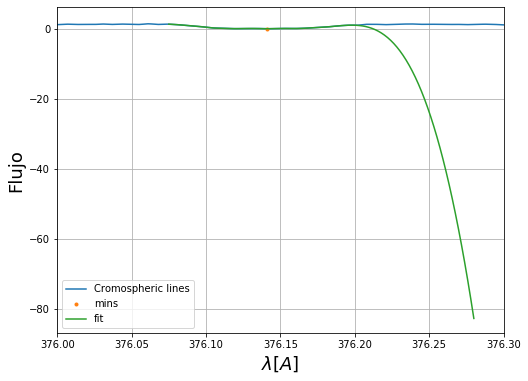

In [136]:
plt.figure(figsize = [8,6])
plt.plot(c_s['waveobs'],c_s['flux'],marker='', ls='-', label = 'Cromospheric lines')
plt.plot(lines_s['waveobs'],lines_s['flux'],marker='.', ls='', label = 'mins')
plt.plot(fit1['L'],fit1['I'],marker='', ls='-', label = 'fit')

plt.xlim(376,376.3)
#plt.ylim(-2.5, 3)
plt.grid()
plt.legend(loc="best")
plt.ylabel("Flujo",fontsize=18)
plt.xlabel("$\lambda [A]$",fontsize=18)
#plt.legend(fontsize = 14)
plt.show()


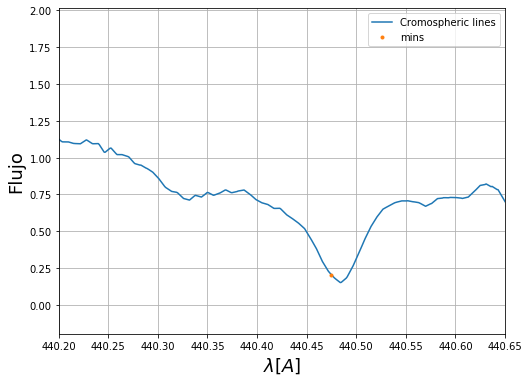

In [42]:
plt.figure(figsize = [8,6])
plt.plot(c_s['waveobs'],c_s['flux'],marker='', ls='-', label = 'Cromospheric lines')
plt.plot(lines_s['waveobs'],lines_s['flux'],marker='.', ls='', label = 'mins')
plt.xlim(440.2,440.65)
#plt.ylim(-2.5, 3)
plt.grid()
plt.legend(loc="best")
plt.ylabel("Flujo",fontsize=18)
plt.xlabel("$\lambda [A]$",fontsize=18)
#plt.legend(fontsize = 14)
plt.show()

In [ ]:
mins #Punto de tabla
Data[mins['L']+]